In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf
import glob

data_path = "./func_test/empty/"

filelist = glob.glob(data_path+'*.jpg')
empty_data = np.empty((len(filelist),256,256,3))
print(empty_data.shape)
count = 0 

for file_name in filelist:
    temp_image = Image.open(file_name)
    temp_image = temp_image.resize((256, 256))
    temp_array = np.asarray(temp_image)
    empty_data[count] = temp_array
    count +=1

from tensorflow import keras
model = keras.models.load_model('model_22_01_11_notts_tuam')
empty_prediction = model.predict(empty_data)


(300, 256, 256, 3)


In [2]:
data_path = "./func_test/full/"

filelist = glob.glob(data_path+'*.jpg')
full_data = np.empty((len(filelist),256,256,3))
print(full_data.shape)
count = 0 

for file_name in filelist:
    temp_image = Image.open(file_name)
    temp_image = temp_image.resize((256, 256))
    temp_array = np.asarray(temp_image)
    full_data[count] = temp_array
    count +=1

from tensorflow import keras
model = keras.models.load_model('model_22_01_11_notts_tuam')
full_prediction = model.predict(full_data)
full_prediction

(1899, 256, 256, 3)


array([[ 2.967779 , 17.986965 ],
       [ 2.484168 , 18.602314 ],
       [ 6.069951 , 10.1942835],
       ...,
       [-1.378803 , 26.982056 ],
       [-1.982434 , 28.647224 ],
       [-1.8398259, 28.309523 ]], dtype=float32)

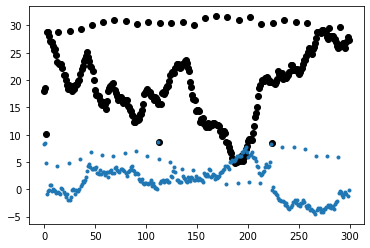

In [59]:
import matplotlib.pyplot as plt

plot = plt.plot(full_prediction[:300,1], 'o',color ='black')
plot_2 = plt.plot(empty_prediction[:,1], '.')

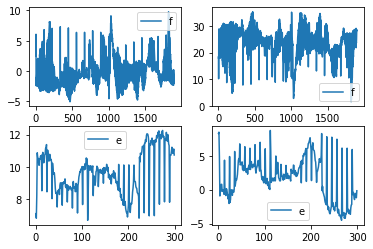

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 2)
# fig.suptitle('Vertically stacked subplots')
ax1[0].plot(full_prediction[:,0])
ax1[0].legend('f0')
ax2[0].plot(empty_prediction[:,0])
ax2[0].legend('e0')
ax1[1].plot(full_prediction[:,1])
ax1[1].legend('f1')
ax2[1].plot(empty_prediction[:,1])
ax2[1].legend('e1')

In [14]:
full_prediction.shape


(1899, 2)

[10.775223  -0.8304307]


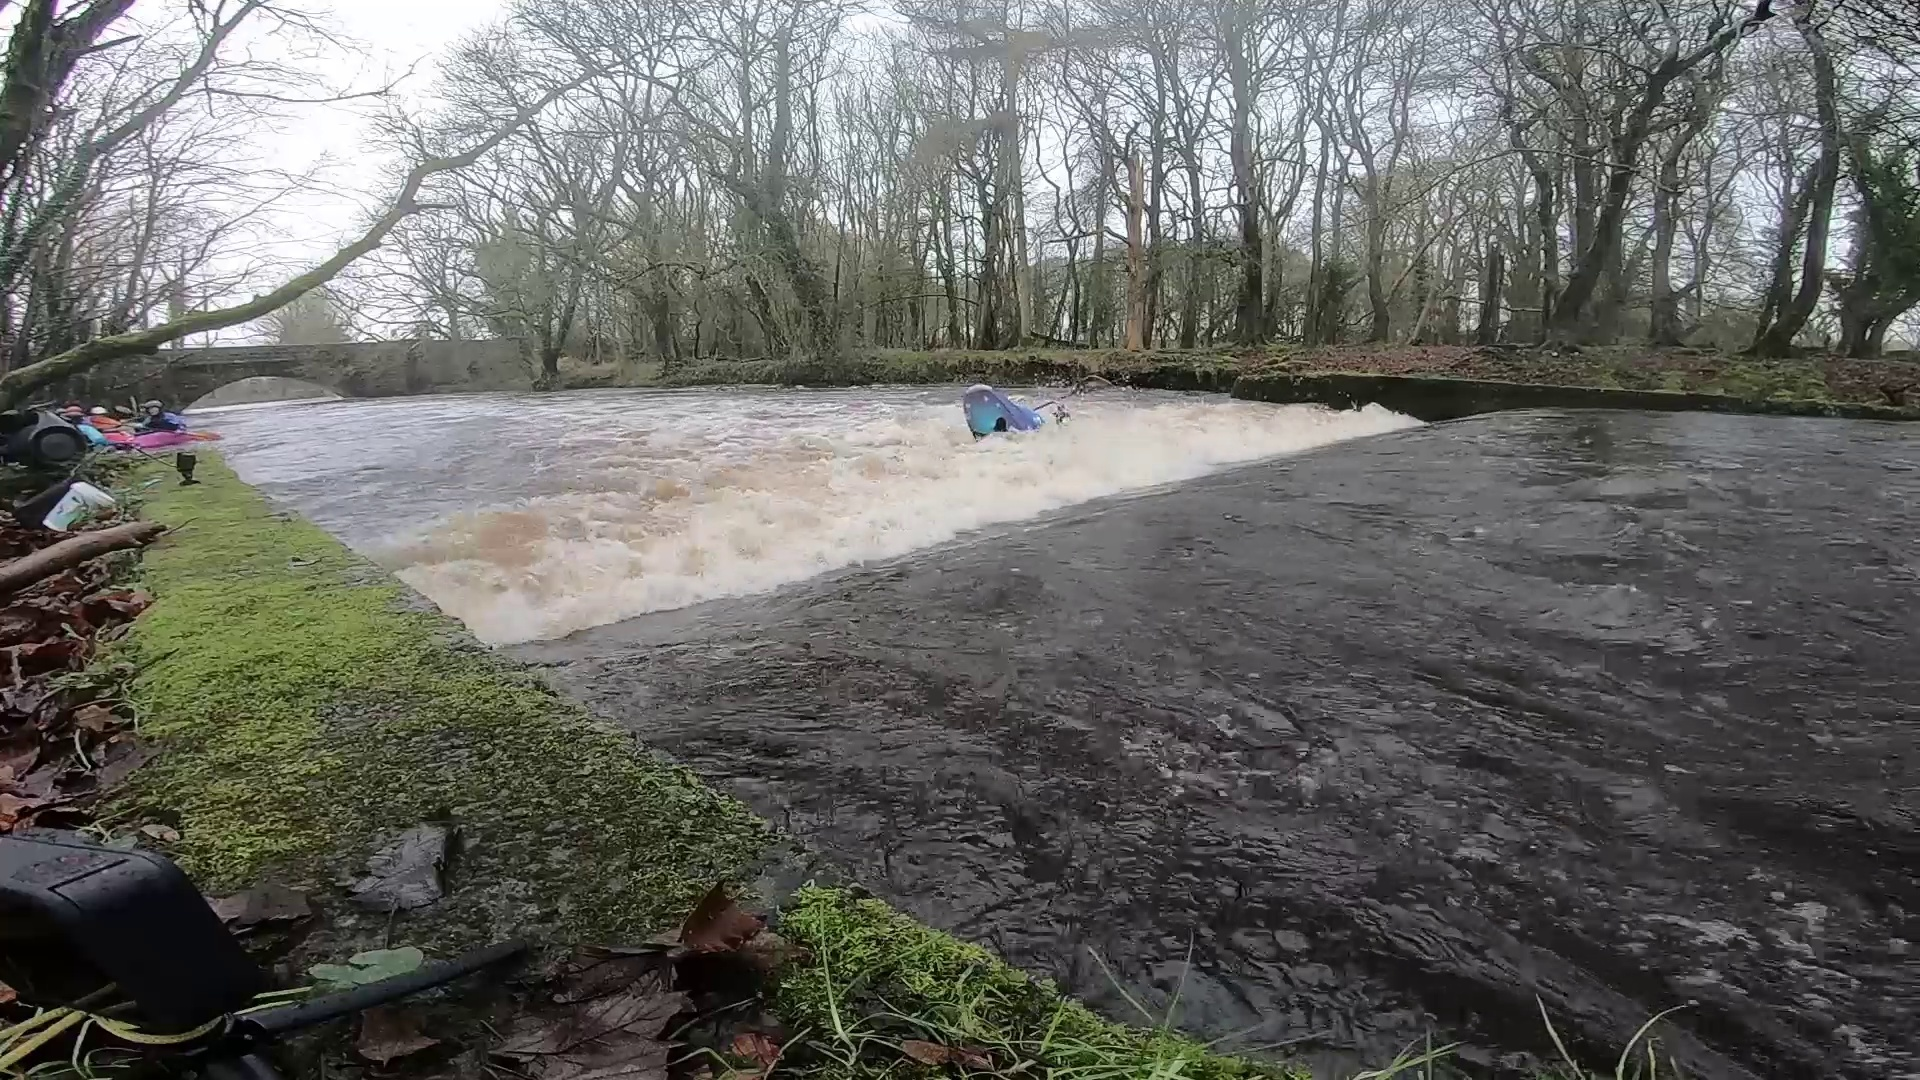

In [44]:
test = 30
print(empty_prediction[test])
test_image = Image.open(filelist[test])
test_image